In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

# Evolution Charts

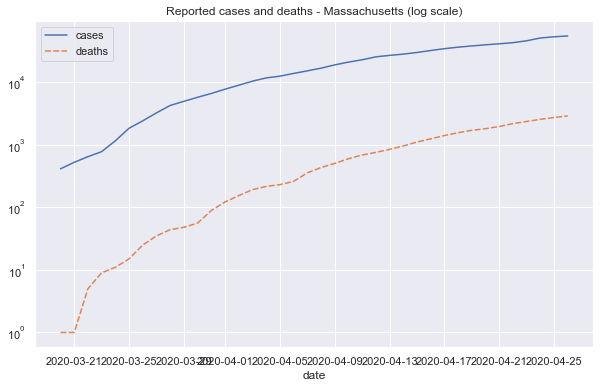

In [3]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

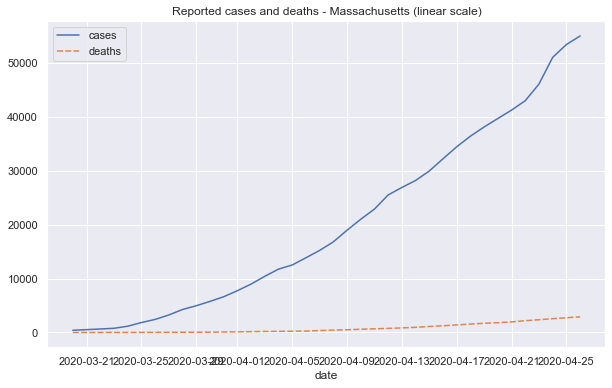

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

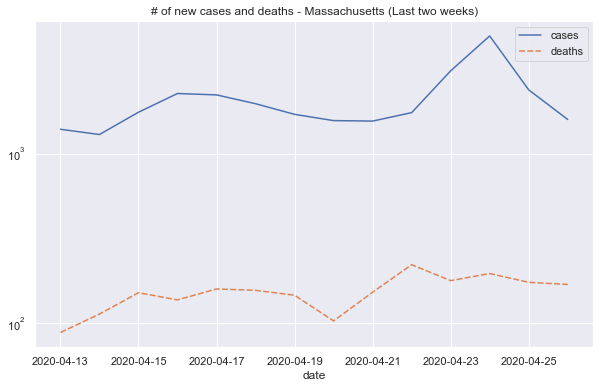

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

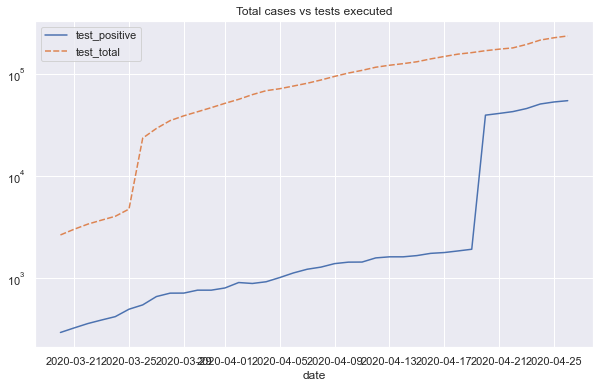

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

In [7]:
df[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-20,39643,1809,39643,169398
2020-04-21,41199,1961,41199,175372
2020-04-22,42944,2182,42944,180462
2020-04-23,46023,2360,46023,195076
2020-04-24,50969,2556,50969,215213
2020-04-25,53348,2730,53348,226845
2020-04-26,54938,2899,54938,236100


In [8]:
df.pct_change().iloc[-7:]

,cases,deaths,test_positive,test_total
date,,,,
2020-04-20,0.041127,0.060375,19.529777,0.044113
2020-04-21,0.039250,0.084024,0.039250,0.035266
2020-04-22,0.042355,0.112698,0.042355,0.029024
2020-04-23,0.071698,0.081577,0.071698,0.080981
2020-04-24,0.107468,0.083051,0.107468,0.103226
2020-04-25,0.046675,0.068075,0.046675,0.054049
2020-04-26,0.029804,0.061905,0.029804,0.040799
